# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")  # To ingnore any warnings

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [2]:
df=pd.read_csv("Diabetes.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
462,8,74,70,40,49,35.3,0.705,39,0
65,5,99,74,27,0,29.0,0.203,32,0
238,9,164,84,21,0,30.8,0.831,32,1
535,4,132,0,0,0,32.9,0.302,23,1
558,11,103,68,40,0,46.2,0.126,42,0
164,0,131,88,0,0,31.6,0.743,32,1
603,7,150,78,29,126,35.2,0.692,54,1
328,2,102,86,36,120,45.5,0.127,23,1
620,2,112,86,42,160,38.4,0.246,28,0
587,6,103,66,0,0,24.3,0.249,29,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [7]:
df['Glucose'].replace(0,df['Glucose'].median(), inplace = True)
df['BloodPressure'].replace(0,df['BloodPressure'].median(), inplace = True)
df['SkinThickness'].replace(0,df['SkinThickness'].median(), inplace = True)
df['Insulin'].replace(0,df['Insulin'].median(), inplace = True)
df['BMI'].replace(0,df['BMI'].median(), inplace = True)

# Q5 Print the descriptive statistics of each & every column using describe() function

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

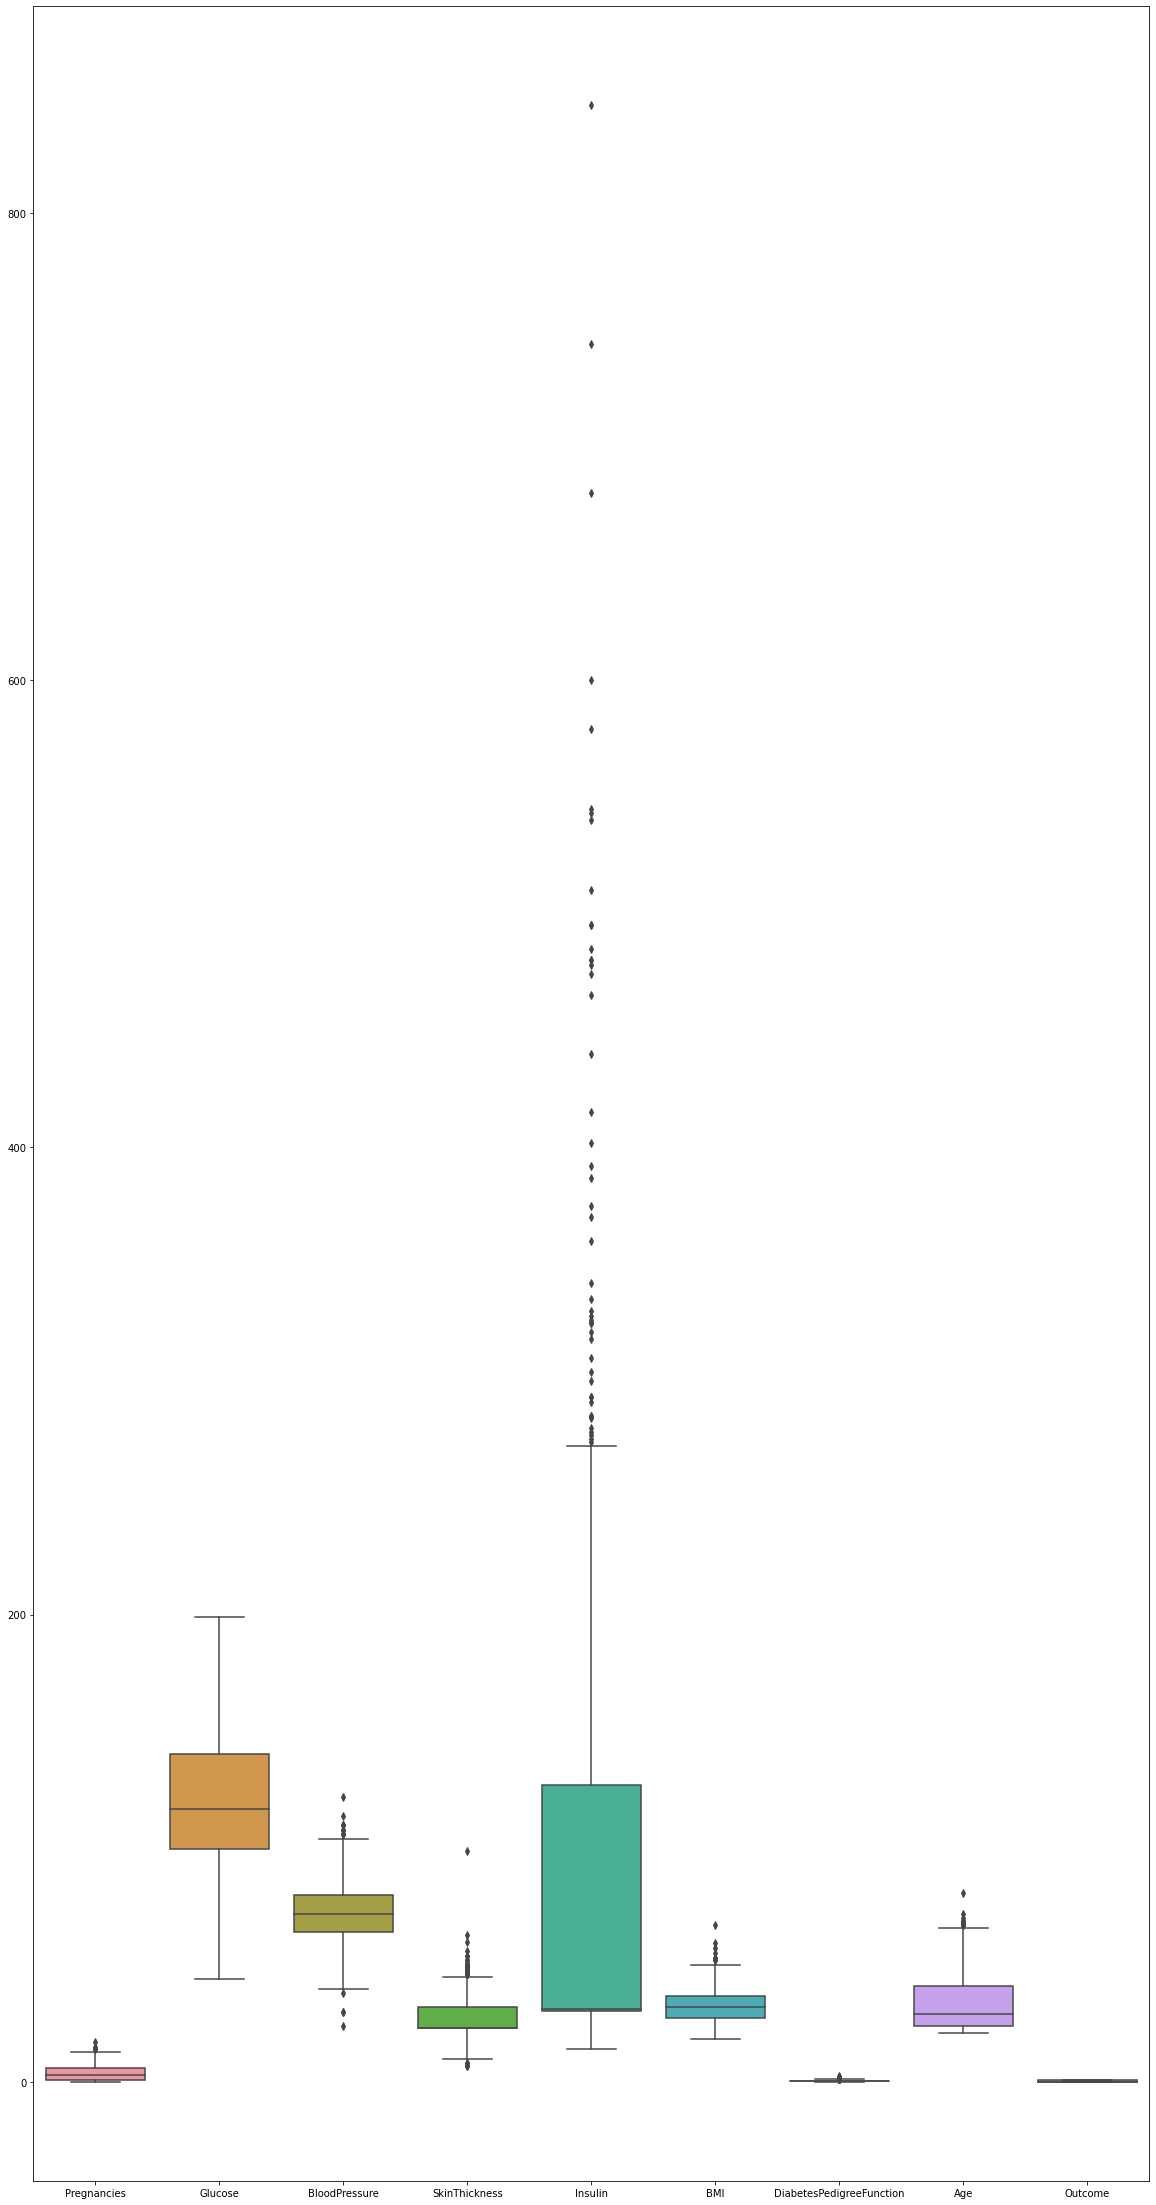

In [9]:
plt.style.use('seaborn-pastel')
plt.figure(figsize= (20,40))
sns.boxplot(data=df)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

### Inference:- Except Glucose column all the other columns has outliers. Glucose,Skinthickness,Insulin and diabetes are right skewed.

In [10]:
pd.value_counts(df['Outcome'])

0    500
1    268
Name: Outcome, dtype: int64

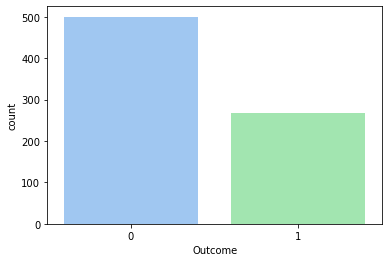

In [11]:
sns.countplot(x='Outcome',data=df)# using countplot

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


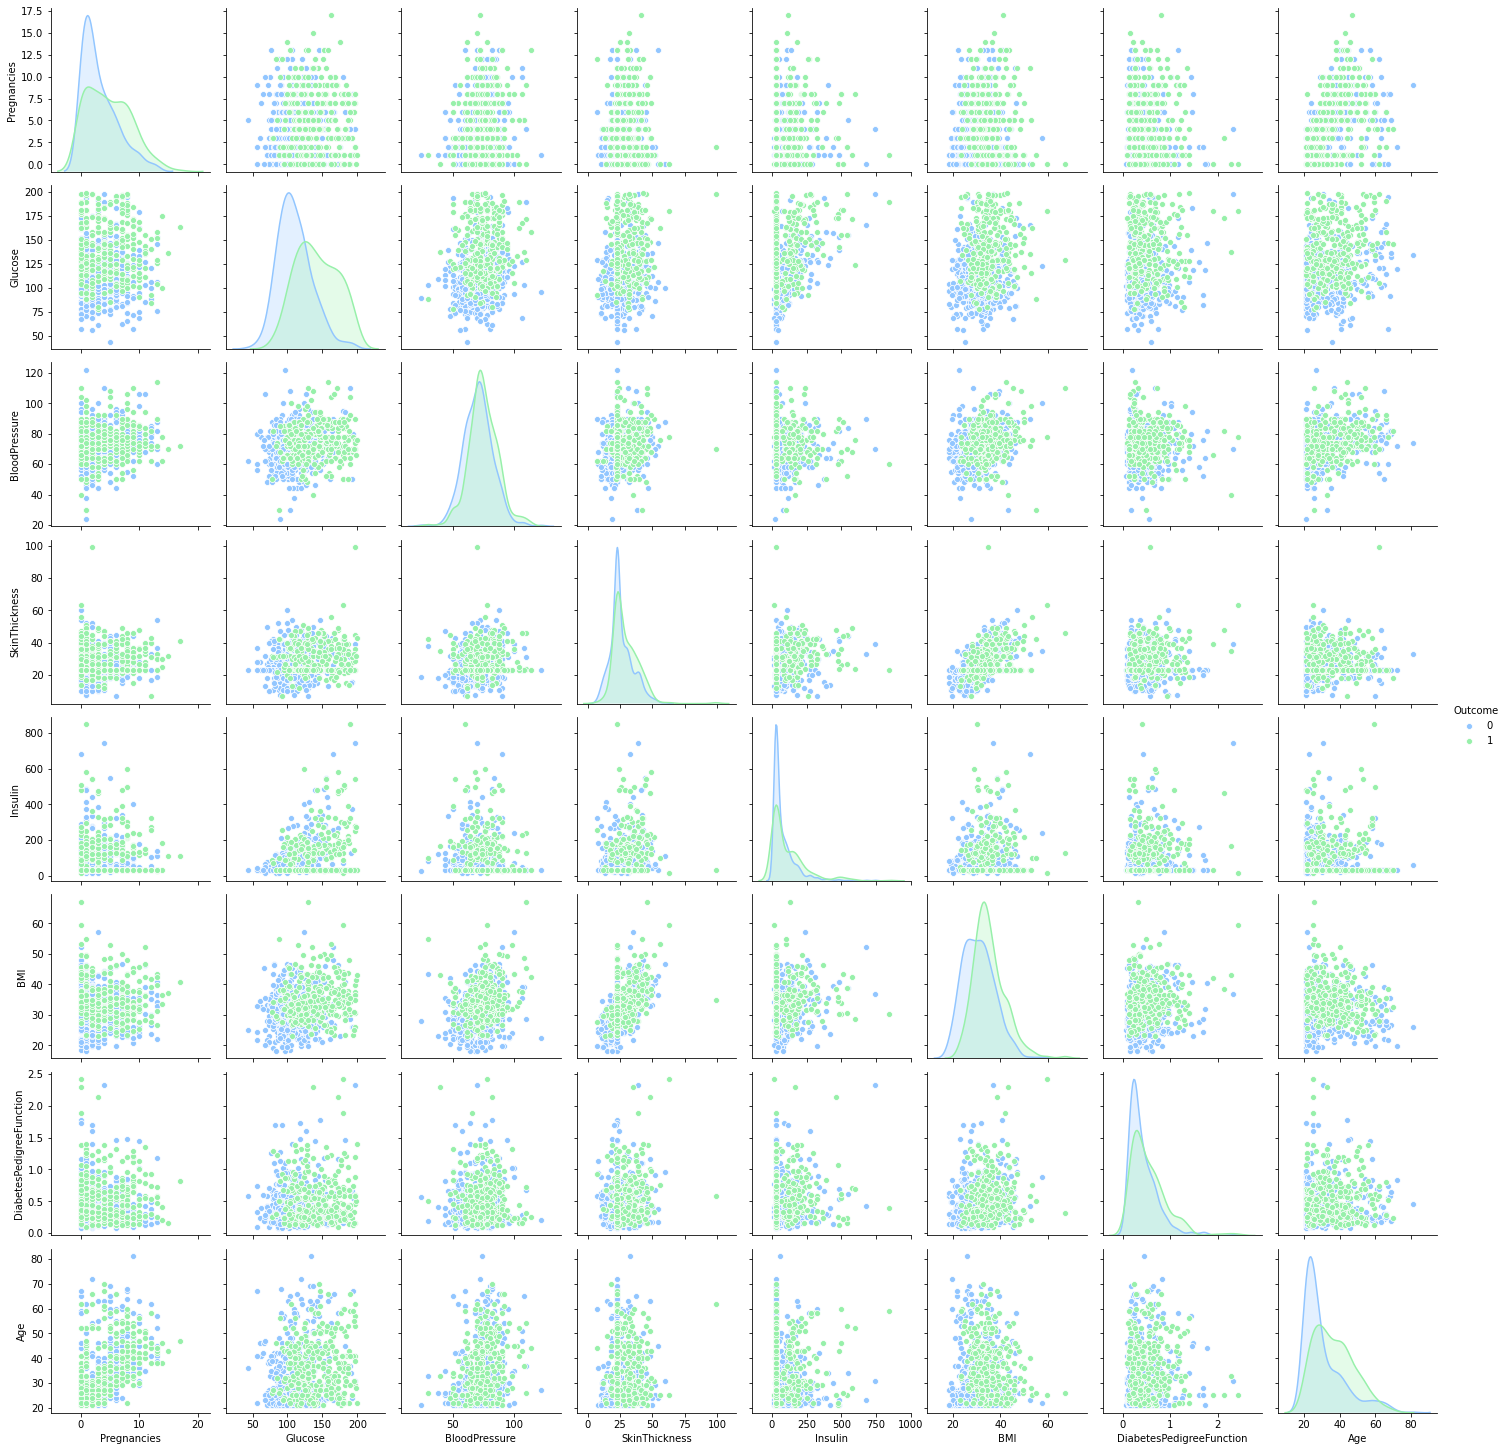

In [12]:
sns.pairplot(df,diag_kind = 'kde',hue='Outcome')

Using the plot - infer the relationship between different variables

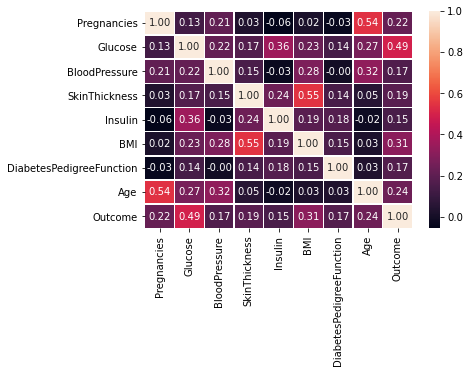

In [13]:
sns.heatmap(df.corr(), annot=True, linewidths=.4, fmt= '.2f')

### Inference:-Outcomes is highly correlated to Glucose, BMI and age.

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [14]:
X=df.iloc[:,0:8]
y=df['Outcome']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)

In [16]:
print(X_train.shape)

(537, 8)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [17]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=3,max_depth=3)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [18]:
pred = dt.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(Y_train,dt.predict(X_train)) 

0.7783985102420856

In [19]:
accuracy_score(Y_test,pred)

0.7532467532467533

In [20]:
confusion_matrix(Y_test,pred)

array([[131,  19],
       [ 38,  43]], dtype=int64)

Print the feature importance of the decision model - Optional

In [21]:
dt.feature_importances_

array([0.        , 0.62243891, 0.        , 0.        , 0.        ,
       0.17613283, 0.        , 0.20142825])

### Inference:-Model is not a good model.

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50, max_depth=6,max_features=5,random_state=1)
rf.fit(X_train,Y_train)
accuracy_score(Y_test,rf.predict(X_test))

0.7359307359307359

In [23]:
accuracy_score(Y_train,rf.predict(X_train))

0.9143389199255121

In [24]:
rf.feature_importances_

array([0.04980079, 0.39326073, 0.04987409, 0.03293881, 0.04477211,
       0.15982048, 0.11098164, 0.15855136])

In [25]:
pd.DataFrame({'Columns':df.columns[:-1],'Imp_Features':rf.feature_importances_}).sort_values(by='Imp_Features',ascending=False)

,Columns,Imp_Features
1,Glucose,0.393261
5,BMI,0.159820
7,Age,0.158551
6,DiabetesPedigreeFunction,0.110982
2,BloodPressure,0.049874
0,Pregnancies,0.049801
4,Insulin,0.044772
3,SkinThickness,0.032939


### Inference:-Model is overfit.

# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ad= AdaBoostClassifier(n_estimators=15,random_state=1)
ad.fit(X_train,Y_train)
accuracy_score(Y_test,ad.predict(X_test))

0.7575757575757576

In [27]:
accuracy_score(Y_train,ad.predict(X_train))

0.8175046554934823

In [28]:
ad.feature_importances_

array([0.        , 0.4       , 0.06666667, 0.        , 0.06666667,
       0.2       , 0.06666667, 0.2       ])

# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [29]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(n_estimators=100,max_samples=0.50)
bg.fit(X_train,Y_train)
accuracy_score(Y_test,bg.predict(X_test))

0.7359307359307359

In [30]:
accuracy_score(Y_train,bg.predict(X_train))

0.9497206703910615

### Inference:-Model is overfit.

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)
accuracy_score(Y_test,gb.predict(X_test))

0.7229437229437229

In [32]:
accuracy_score(Y_train,gb.predict(X_train))

0.9348230912476723

In [33]:
gb.feature_importances_

array([0.05903354, 0.40065006, 0.04234689, 0.02539185, 0.0383149 ,
       0.1722927 , 0.11377202, 0.14819805])

### Inference:-Model is overfit.

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [34]:
from sklearn.ensemble import VotingClassifier
vt = VotingClassifier(estimators =[('rf',RandomForestClassifier()),('ad',AdaBoostClassifier()),('bg',BaggingClassifier()),('gb',GradientBoostingClassifier())])
vt.fit(X_train, Y_train)
accuracy_score(Y_test,vt.predict(X_test))

0.7359307359307359

In [36]:
accuracy_score(Y_train,vt.predict(X_train))

0.962756052141527